<a href="https://colab.research.google.com/github/Lucas-hearc/KeywordSpotting/blob/main/RCNN_KWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa
!pip install numpy
!pip install matplotlib
!pip install tensorflow

In [2]:
import os
import zipfile
from google.colab import drive
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import tensorflow

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')
os.chdir('/content/drive/My Drive/DATA')

Mounted at /content/drive


In [3]:
%cd content/

[Errno 2] No such file or directory: 'content/'
/content


In [92]:
x1 = np.load('content/X_split_test.npy')
x2 = np.load('content/X_split_train.npy')
t1=np.shape(x1)
t2=np.shape(x2)

print(np.shape(x1[1]))

(1600,)


In [7]:
%cd  ..

/


In [41]:
%cd content/drive/MyDrive/DATA/data/data/training/

/content/drive/MyDrive


In [40]:
!pip install --user git+https://github.com/python/processing.git


  Cloning https://github.com/python/processing.git to /tmp/pip-req-build-gnh500te
  Running command git clone --filter=blob:none --quiet https://github.com/python/processing.git /tmp/pip-req-build-gnh500te
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/python/processing.git /tmp/pip-req-build-gnh500te did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/python/processing.git /tmp/pip-req-build-gnh500te did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


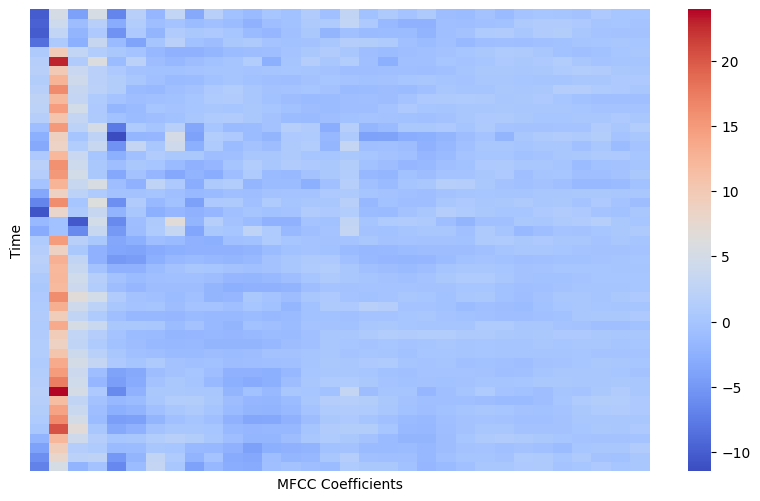

In [58]:
import os
import librosa
import numpy as np
import sys
sys.path.append('/content/drive/MyDrive/DATA/data/data/code')
import functions
import feature
import processing



audioFile = '/content/drive/MyDrive/DATA/data/data/testing/parole/Parole.unknown.40foevmq.ingestion-dffd874c6-lzqhq.s56.wav'

# Paramètres MFCC
nmfcc = 32
frame_length = 0.02
frame_stride = 0.02
filter_number = 32
fft_length = 256
normalization_window_size = 101

audio, sr = librosa.load(audioFile)

mfcc = feature.mfcc(audio,
        sr,
        1,
        frame_length=frame_length,
        frame_stride=frame_stride,
        num_cepstral=nmfcc,
        num_filters=filter_number,
        fft_length=fft_length,
        low_frequency=0,
        high_frequency=None,
        dc_elimination=True,
        use_old_mels=False)

# Tracer la heatmap
plt.figure(figsize=(10, 6))
seaborn.heatmap(data=mfcc, cmap='coolwarm', xticklabels=False, yticklabels=False)

# Ajouter les titres des axes
plt.xlabel('MFCC Coefficients')
plt.ylabel('Time')

# Afficher le tracé
plt.show()




In [62]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, MaxPooling2D, Dropout, Flatten

# Paramètres MFCC
nmfcc = 32
frame_length = 0.02
frame_stride = 0.02
filter_number = 32
fft_length = 256
normalization_window_size = 101

# Liste pour stocker les MFCC de tous les fichiers audio
mfccs = []
labels = []

audioFolder = 'content/drive/MyDrive/DATA/data/data/training/detresse/'

# Parcourir tous les fichiers audio du dossier
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(
            y=audio,
            sr=sr,
            n_mfcc=nmfcc,
            hop_length=int(sr * frame_stride),
            n_fft=int(sr * frame_length),
            n_mels=filter_number,
            win_length=int(sr * frame_length),
            center=False,
            htk=True,
            norm=None,
            window='hann'
        )
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs.append(mfcc)
        labels.append([1,0])


audioFolder = 'content/drive/MyDrive/DATA/data/data/testing/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(
            y=audio,
            sr=sr,
            n_mfcc=nmfcc,
            hop_length=int(sr * frame_stride),
            n_fft=int(sr * frame_length),
            n_mels=filter_number,
            win_length=int(sr * frame_length),
            center=False,
            htk=True,
            norm=None,
            window='hann'
        )
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs.append(mfcc)
        labels.append([0,1])

# Convertir les listes en tableaux numpy 2D
X_train = np.vstack(mfccs)
Y_train = np.array(labels)

print(np.shape(Y_train))

######################################## TESTING ######################################

mfccs_test = []
labels_test = []

audioFolder = 'content/drive/MyDrive/DATA/data/data/testing/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(
            y=audio,
            sr=sr,
            n_mfcc=nmfcc,
            hop_length=int(sr * frame_stride),
            n_fft=int(sr * frame_length),
            n_mels=filter_number,
            win_length=int(sr * frame_length),
            center=False,
            htk=True,
            norm=None,
            window='hann'
        )
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs_test.append(mfcc)
        labels_test.append([0,1])

audioFolder = 'content/drive/MyDrive/DATA/data/data/training/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(
            y=audio,
            sr=sr,
            n_mfcc=nmfcc,
            hop_length=int(sr * frame_stride),
            n_fft=int(sr * frame_length),
            n_mels=filter_number,
            win_length=int(sr * frame_length),
            center=False,
            htk=True,
            norm=None,
            window='hann'
        )
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs_test.append(mfcc)
        labels_test.append([1,0])

# Convertir les listes en tableaux numpy 2D
X_test = np.vstack(mfccs_test)
Y_test = np.array(labels_test)

# Mélanger les données d'entraînement
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
Y_train = Y_train[indices]

indices = np.arange(X_test.shape[0])
np.random.shuffle(indices)
X_test = X_test[indices]
Y_test = Y_test[indices]


model = Sequential()
model.add(Reshape((25, 64, 1), input_shape=input_shape))
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Définition de l'optimiseur et de la fonction de perte
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
loss = tf.keras.losses.CategoricalCrossentropy()

# Compilation du modèle
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)



(216, 2)
Epoch 1/100
7/7 - 1s - loss: 185.5217 - accuracy: 0.7407 - val_loss: 66.9784 - val_accuracy: 0.7912 - 1s/epoch - 214ms/step
Epoch 2/100
7/7 - 0s - loss: 109.7620 - accuracy: 0.6019 - val_loss: 51.6521 - val_accuracy: 0.7912 - 307ms/epoch - 44ms/step
Epoch 3/100
7/7 - 0s - loss: 76.3833 - accuracy: 0.8102 - val_loss: 9.2814 - val_accuracy: 0.7857 - 318ms/epoch - 45ms/step
Epoch 4/100
7/7 - 0s - loss: 26.6425 - accuracy: 0.6528 - val_loss: 11.4214 - val_accuracy: 0.2967 - 311ms/epoch - 44ms/step
Epoch 5/100
7/7 - 0s - loss: 16.5914 - accuracy: 0.6019 - val_loss: 1.4163 - val_accuracy: 0.7802 - 288ms/epoch - 41ms/step
Epoch 6/100
7/7 - 0s - loss: 8.4330 - accuracy: 0.7963 - val_loss: 0.8978 - val_accuracy: 0.7747 - 379ms/epoch - 54ms/step
Epoch 7/100
7/7 - 0s - loss: 6.1858 - accuracy: 0.8102 - val_loss: 0.7212 - val_accuracy: 0.5604 - 378ms/epoch - 54ms/step
Epoch 8/100
7/7 - 0s - loss: 5.3938 - accuracy: 0.7500 - val_loss: 0.8263 - val_accuracy: 0.3187 - 288ms/epoch - 41ms/step

In [17]:
seaborn.heatmap(data=mfccs[0], cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

IndexError: ignored

In [ ]:
import os
import zipfile
from google.colab import drive
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import tensorflow

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')
os.chdir('/content/drive/My Drive/DATA')
os.chdir('/content/drive/My Drive/DATA/training/au_secours')

# Paramètres MFCC
nmfcc = 32
hop_length = 512

# Liste pour stocker les MFCC de tous les fichiers audio
mfccs = []
i = 0
label_0 = []
label_1 = []
label = []
# Parcourir tous les fichiers audio du dossier
for filename in os.listdir(os.curdir):

    if filename.endswith('.wav'):

        label_1.append(1)
        # Charger le fichier audio
        audio_path = os.path.join(os.curdir, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=nmfcc, hop_length=hop_length)
        # Ajouter les MFCC à la liste
        mfccs.append(mfcc)

os.chdir('/content/drive/My Drive/DATA/training/noise')
for filename in os.listdir(os.curdir):

    if filename.endswith('.wav'):

        label_0.append(0)
        # Charger le fichier audio
        audio_path = os.path.join(os.curdir, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=nmfcc, hop_length=hop_length)
        # Ajouter les MFCC à la liste
        mfccs.append(mfcc)
# Convertir la liste en tableau Numpy
label = label_1 + label_0

mfccs = np.asarray(mfccs)
label = np.asarray(label)

model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(13,44,1)),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(units=128, activation='relu'),
    tensorflow.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(mfccs, label, epochs=10, batch_size=32)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
44/44 [==============================] - 2s 21ms/step - loss: 1.3828 - accuracy: 0.9199
Epoch 2/10
44/44 [==============================] - 1s 28ms/step - loss: 0.0574 - accuracy: 0.9907
Epoch 3/10
44/44 [==============================] - 2s 35ms/step - loss: 0.0042 - accuracy: 0.9986
Epoch 4/10
44/44 [==============================] - 1s 34ms/step - loss: 0.0072 - accuracy: 0.9971
Epoch 5/10
44/44 [==============================] - 1s 33ms/step - loss: 0.0158 - accuracy: 0.9943
Epoch 6/10
44/44 [==============================] - 1s 21ms/step - loss: 8.1264e-04 - accuracy: 0.9993
Epoch 7/10
44/44 [==============================] - 1s 20ms/step - loss: 2.3360e-05 - accuracy: 1.0000
Epoch 8/10
44/44 [==============================] - 1s 21ms/step - loss: 1.3904e-05 - accuracy: 1.0000
Epoch 9/10
44/44 [==============================] - 2s 35ms/step - 

In [ ]:
mfccs = np.asarray(mfccs)
label = np.asarray(label)
print(mfccs.shape)
print(label.shape)

(1398, 13, 44)
(1398,)


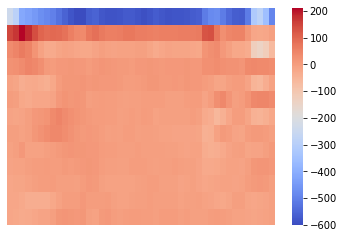

In [ ]:
seaborn.heatmap(data=mfccs[0], cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(13,44,1)),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(units=128, activation='relu'),
    tensorflow.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(mfccs, label, epochs=10, batch_size=32)

Epoch 1/10
44/44 [==============================] - 2s 21ms/step - loss: 1.5205 - accuracy: 0.9235
Epoch 2/10
44/44 [==============================] - 1s 21ms/step - loss: 0.0324 - accuracy: 0.9943
Epoch 3/10
44/44 [==============================] - 1s 25ms/step - loss: 0.0085 - accuracy: 0.9971
Epoch 4/10
44/44 [==============================] - 1s 32ms/step - loss: 0.0097 - accuracy: 0.9971
Epoch 5/10
44/44 [==============================] - 1s 22ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 6/10
44/44 [==============================] - 1s 21ms/step - loss: 5.1763e-04 - accuracy: 1.0000
Epoch 7/10
44/44 [==============================] - 1s 20ms/step - loss: 1.8047e-04 - accuracy: 1.0000
Epoch 8/10
44/44 [==============================] - 1s 20ms/step - loss: 1.1977e-04 - accuracy: 1.0000
Epoch 9/10
44/44 [==============================] - 1s 20ms/step - loss: 9.5970e-05 - accuracy: 1.0000
Epoch 10/10
44/44 [==============================] - 1s 29ms/step - loss: 8.3491e-05 - accura

In [ ]:
model.save('kws_model2.h5')

1/1 [==============================] - 0s 62ms/step
(13, 44)
prediction bon : [[0.00098328]]


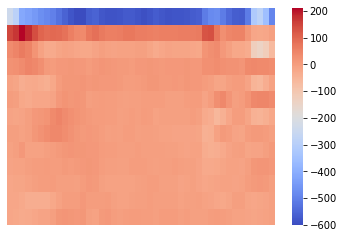

prediction mauvais : [[0.41183206]]


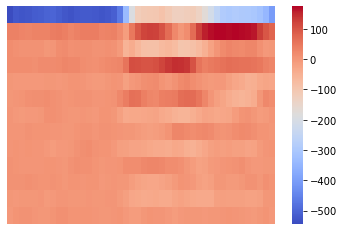

In [ ]:
model = tensorflow.keras.models.load_model('kws_model2.h5')

# Charger le fichier audio
audio_file_bon = '/content/drive/MyDrive/DATA/testing/au_secours_test.wav'
audio_file_mauvais ='/content/drive/MyDrive/DATA/testing/unknown.1ed0b13d_nohash_1.wav.3rugckda.ingestion-5877979785-4ctzf.wav'
samples1, sample_rate1 = librosa.load(audio_file_bon)
samples2, sample_rate2 = librosa.load(audio_file_mauvais)

# Extraire les caractéristiques MFCC
mfccs_bon = librosa.feature.mfcc(y=samples1, sr=22050, n_mfcc=13)
mfccs_mauvais = librosa.feature.mfcc(y=samples2, sr=22050, n_mfcc=13)


mfccs_bon_reshaped = np.reshape(mfccs_bon, (13, 44, 1))
mfccs_mauvais_reshaped = np.reshape(mfccs_mauvais, (13, 44, 1))


# Prédire le mot-clé
prediction_bon = model.predict(np.array([mfccs_bon_reshaped]))
prediction_mauvais = model.predict(np.array([mfccs_mauvais_reshaped]))

mfccs_plot =np.squeeze(np.array([mfccs_bon_reshaped]))
print(mfccs_plot.shape)


seaborn.heatmap(data=mfccs_plot, cmap='coolwarm', xticklabels=False, yticklabels=False)
print(f"prediction bon : {prediction_bon}")
plt.show()
seaborn.heatmap(data=mfccs_mauvais, cmap='coolwarm', xticklabels=False, yticklabels=False)
print(f"prediction mauvais : {prediction_mauvais}")
